Kepler Exoplanet Search Results
==

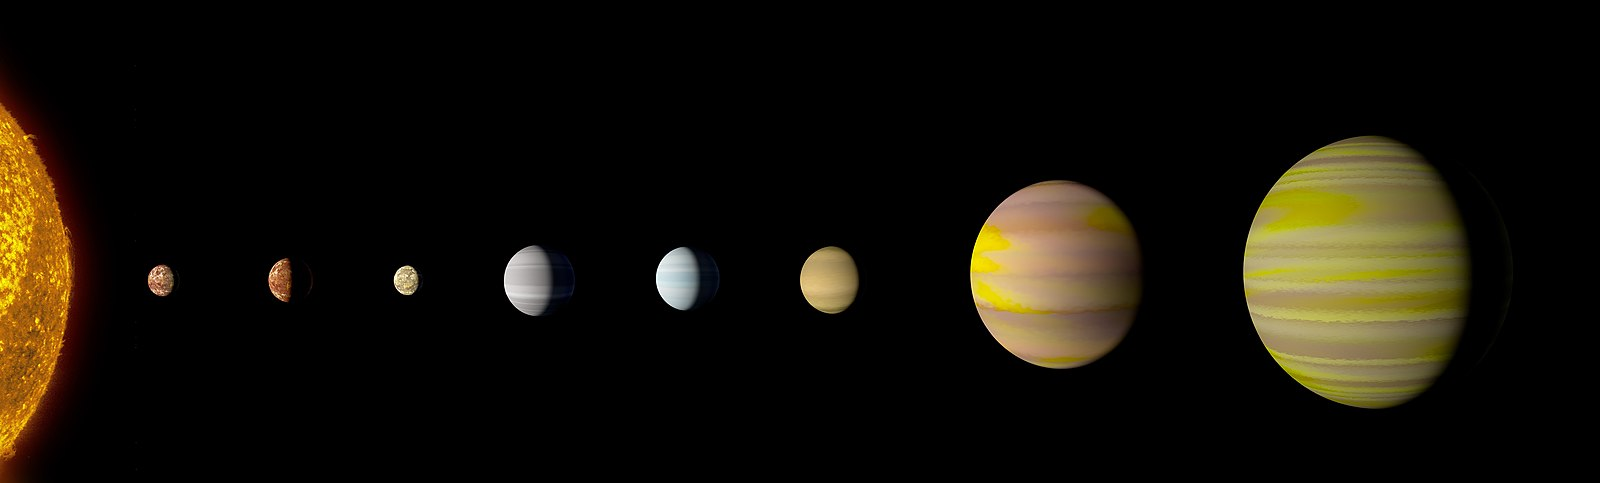

In [1]:
from IPython.display import Image
Image('C:\\Users\\xsale\\Desktop\\DSBA\\Python_Project\\pic.jpg')

<br><br><br><br><br>

Data loading, description and cleanup
==

The dataset and its original description is available by the following link:<br>
https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results?resource=download

The Kepler Space Observatory is a NASA-build satellite that was launched in 2009. The telescope is dedicated to searching for exoplanets in star systems besides our own, with the ultimate goal of possibly finding other habitable planets besides our own.

This dataset is a cumulative record of all observed Kepler "objects of interest" — basically, all of the approximately 10,000 exoplanet candidates Kepler has taken observations on.

The original description of the columns can be found by the following link:<br>
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [2]:
# Loading the data
import pandas as pd

path = r"C:\Users\xsale\Desktop\DSBA\Python_Project\cumulative.csv"
data = pd.read_csv(path)
data

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [3]:
# Overview of the names of the columns
print(*data.columns, sep='\n')

rowid
kepid
kepoi_name
kepler_name
koi_disposition
koi_pdisposition
koi_score
koi_fpflag_nt
koi_fpflag_ss
koi_fpflag_co
koi_fpflag_ec
koi_period
koi_period_err1
koi_period_err2
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_teq
koi_teq_err1
koi_teq_err2
koi_insol
koi_insol_err1
koi_insol_err2
koi_model_snr
koi_tce_plnt_num
koi_tce_delivname
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_srad
koi_srad_err1
koi_srad_err2
ra
dec
koi_kepmag


In [4]:
# All the columns that include "_err1" or "_err2" in their name
# contain possible positive and negative errors in estimations.
# So, we exclude those columns, and will focus only on the main values
col_to_drop = [col for col in data.columns if "_err" in col]
data = data.drop(columns=col_to_drop)

In [5]:
# Also we will not need the following columns:
# rowid, kepid as the contain ids of the planets
# kepoi_name, kepler_name as they contain names of the planets
# koi_tce_plnt_num, koi_tce_delivname as they contain the number and the name in TCE (Threshold Crossing Event) system
data = data.drop(columns=['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname'])

In [6]:
# Columns 'ra' and 'dec' can also be deleted because they replesent the coordinates 
# used in the celestial coordinate system to locate the star on the sky
data = data.drop(columns=['ra', 'dec'])

<br><br><br><br><br>

In astronomy **transit** (or astronomical transit) is the passage of a celestial body directly between a larger body and the observer. As viewed from a particular vantage point, the transiting body appears to move across the face of the larger body, covering a small portion of it.

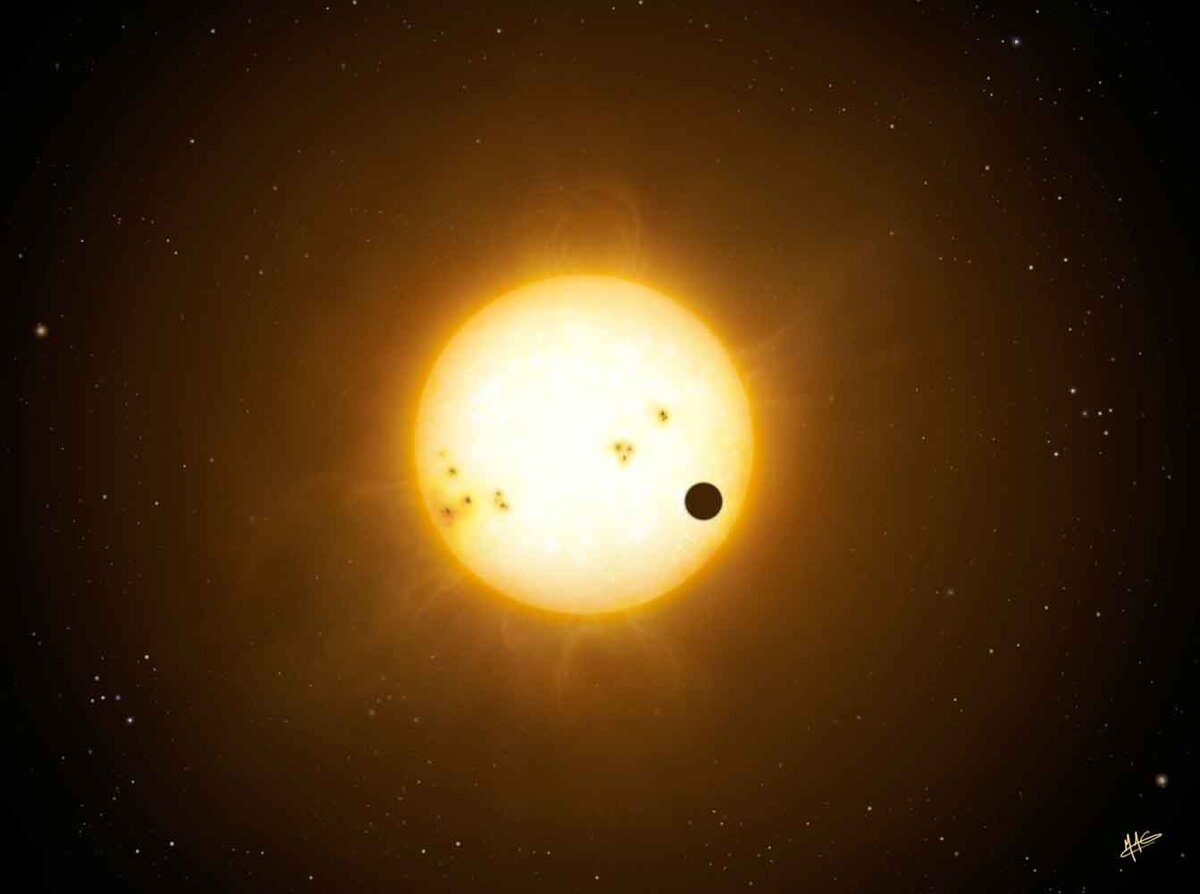

In [7]:
from IPython.display import Image
Image('C:\\Users\\xsale\\Desktop\\DSBA\\Python_Project\\pic2.jpg', width=400)

The values in this dataset were obtained with the help of this method.

In [8]:
# The following columns can be dropped as they describe properties of transit estimation
# koi_time0bk - the time of the planet's passage through the star's disk (transit) in barycentric Julian date (BJD)
# koi_depth - the transit depth, expressed as a change in the brightness of the star in millionths
# koi_model_snr - signal-to-noise ratio for the transit model
# koi_impact - the impact parameter of the transit
# koi_fpflag_nt, koi_fpflag_ss, koi_fpflag_co, koi_fpflag_ec - boolean values concerning transit estimations
data = data.drop(columns=['koi_time0bk', 'koi_depth', 'koi_model_snr', 'koi_impact',
                          'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'])

<br><br><br><br><br>

Finally, there are three columns describing the prediction about objects being planets.<br>
"koi_disposition" provides the final result.<br>
"koi_pdisposition" provides the preliminary status of the candidate planet set by the Kepler data processing pipeline.<br>
"koi_score" represents the probability that the candidate is a planet (from 0 to 1).<br><br>

Of these columns, we will leave only the first one, because it contains the main results confirmed by scientists.

In [9]:
# Deleting columns based on the reasoning above
data = data.drop(columns=['koi_pdisposition', 'koi_score'])

<br><br><br><br><br>

In [10]:
# Data without unnecessary columns
data

,koi_disposition,koi_period,koi_duration,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,9.488036,2.95750,2.26,793.0,93.59,5455.0,4.467,0.927,15.347
1,CONFIRMED,54.418383,4.50700,2.83,443.0,9.11,5455.0,4.467,0.927,15.347
2,FALSE POSITIVE,19.899140,1.78220,14.60,638.0,39.30,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,1.736952,2.40641,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597
4,CONFIRMED,2.525592,1.65450,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509
...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,8.589871,4.80600,1.11,929.0,176.40,5638.0,4.296,1.088,14.478
9560,FALSE POSITIVE,0.527699,3.22210,29.35,2088.0,4500.53,5638.0,4.529,0.903,14.082
9561,CANDIDATE,1.739849,3.11400,0.72,1608.0,1585.81,6119.0,4.444,1.031,14.757
9562,FALSE POSITIVE,0.681402,0.86500,1.07,2218.0,5713.41,6173.0,4.447,1.041,15.385


Columns description
--

The columns describe characteristics of Kepler Objects of Interest (KOIs), which are potential exoplanet candidates identified by the Kepler space telescope.<br><br>
**koi_disposition** — a categorical variable indicating the final classification of the KOI. <br>
    Its values include:<br>
     `CONFIRMED` — the KOI has been confirmed as a planet.<br>
     `CANDIDATE` — the KOI is a strong candidate but requires further confirmation.<br>
     `FALSE POSITIVE` — the KOI has been determined not to be a planet.<br>
**koi_period** — The orbital period of the KOI (in days). This is the time it takes the object to complete one orbit around its host star.<br>
**koi_duration** — The duration of the transit (in days). This is how long the planet blocks a portion of the star's light as seen from Earth.<br>
**koi_prad** — The radius of the planet (in units of the radius of Earth).<br>
**koi_teq** — The equilibrium temperature of the planet's surface (in Kelvin).<br>
**koi_insol** — The stellar insolation received by the planet (in units of Earth's insolation). This measures the amount of energy the planet receives from its host star.<br>
**koi_steff** — The effective temperature of the surface of the host star (in Kelvin).<br>
**koi_slogg** — The base-10 logarithm of the acceleration due to gravity at the surface of the star.<br>
**koi_srad** — The radius of the host star (in units of the Sun's radius).<br>
**koi_kepmag** —  The Kepler apparent magnitude of the host star. This is a measure of the star's brightness as seen from Earth. Lower values indicate brighter stars.

<br><br><br><br><br>

Empty values processing
--

In [11]:
# Counting the number of missing values for each column
data.isnull().sum()

koi_disposition      0
koi_period           0
koi_duration         0
koi_prad           363
koi_teq            363
koi_insol          321
koi_steff          363
koi_slogg          363
koi_srad           363
koi_kepmag           1
dtype: int64

In [12]:
# as we can see, there are a few missing values in each column, 
# so deleting the corresponding rows will not cause the loss of the main data
data = data.dropna()
data

,koi_disposition,koi_period,koi_duration,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,9.488036,2.95750,2.26,793.0,93.59,5455.0,4.467,0.927,15.347
1,CONFIRMED,54.418383,4.50700,2.83,443.0,9.11,5455.0,4.467,0.927,15.347
2,FALSE POSITIVE,19.899140,1.78220,14.60,638.0,39.30,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,1.736952,2.40641,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597
4,CONFIRMED,2.525592,1.65450,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509
...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,8.589871,4.80600,1.11,929.0,176.40,5638.0,4.296,1.088,14.478
9560,FALSE POSITIVE,0.527699,3.22210,29.35,2088.0,4500.53,5638.0,4.529,0.903,14.082
9561,CANDIDATE,1.739849,3.11400,0.72,1608.0,1585.81,6119.0,4.444,1.031,14.757
9562,FALSE POSITIVE,0.681402,0.86500,1.07,2218.0,5713.41,6173.0,4.447,1.041,15.385


In [13]:
# Final check that there are no missing values
data.isnull().sum()

koi_disposition    0
koi_period         0
koi_duration       0
koi_prad           0
koi_teq            0
koi_insol          0
koi_steff          0
koi_slogg          0
koi_srad           0
koi_kepmag         0
dtype: int64

In [14]:
# Analysing type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9563
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9200 non-null   object 
 1   koi_period       9200 non-null   float64
 2   koi_duration     9200 non-null   float64
 3   koi_prad         9200 non-null   float64
 4   koi_teq          9200 non-null   float64
 5   koi_insol        9200 non-null   float64
 6   koi_steff        9200 non-null   float64
 7   koi_slogg        9200 non-null   float64
 8   koi_srad         9200 non-null   float64
 9   koi_kepmag       9200 non-null   float64
dtypes: float64(9), object(1)
memory usage: 790.6+ KB


Here we can see that all walues have the proper type float64, which corresponds to float numbers, and the following analysis can be done.

<br><br><br><br><br>

Selection of data with confirmed planets only
--

It was noted above that the koi_disposition column contains information about whether the candidate object is a planet. If the value is CONFIRMED in this column, then the object under study is indeed a planet. We will create a DataFrame with only confirmed planets.

In [15]:
# Counting values of koi_disposition 
vals = data["koi_disposition"].value_counts()
vals

FALSE POSITIVE    4723
CONFIRMED         2292
CANDIDATE         2185
Name: koi_disposition, dtype: int64

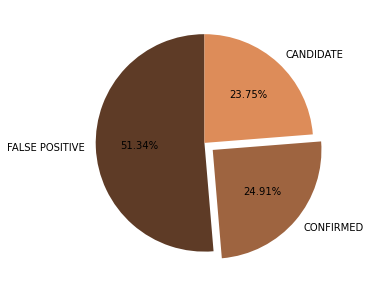

In [16]:
# The piechart with proportions of the types of KOI objects
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))
cmap = plt.get_cmap("copper")
colors = cmap(np.linspace(0.3, 0.7, 3))
plt.pie(x=vals.values, labels=vals.index, autopct='%1.2f%%', startangle=90, explode=(0, 0.1, 0), colors=colors)
plt.show()

It can be seen that there are not many confirmed planets in the entire dataset (relative to all the studied objects), but we want to work only with confirmed objects.<br>
Now, since the koi_disposition column contains only the CONFIRMED values, we can delete this column.<br>
After some rows are deleted, we need to reset indexes.

In [17]:
confirmed_data = data[data["koi_disposition"] == "CONFIRMED"]
confirmed_data = confirmed_data.drop(columns=['koi_disposition'])
confirmed_data = confirmed_data.reset_index(drop=True)
confirmed_data

,koi_period,koi_duration,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,9.488036,2.9575,2.26,793.0,93.59,5455.0,4.467,0.927,15.347
1,54.418383,4.5070,2.83,443.0,9.11,5455.0,4.467,0.927,15.347
2,2.525592,1.6545,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509
3,11.094321,4.5945,3.90,835.0,114.81,6046.0,4.486,0.972,15.714
4,4.134435,3.1402,2.77,1160.0,427.65,6046.0,4.486,0.972,15.714
...,...,...,...,...,...,...,...,...,...
2287,86.116089,6.0580,3.11,441.0,8.93,6161.0,4.454,1.053,15.831
2288,0.968981,1.5170,1.08,1844.0,2730.51,5866.0,4.473,1.000,15.415
2289,49.356791,10.9540,1.91,637.0,38.86,5862.0,4.050,1.670,11.565
2290,91.078624,10.3040,3.26,415.0,7.02,5915.0,4.437,1.008,15.214


<br><br><br><br><br>

Overview of the final dataset
--

In [18]:
# Descriptive statistics of the dataset
confirmed_data.describe()

,koi_period,koi_duration,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,27.052677,4.306581,2.871571,839.125654,350.666139,5477.974258,4.410754,1.066548,14.339072
std,54.028035,2.720317,3.361129,386.740567,1223.675730,677.133088,0.235333,0.642967,1.223510
min,0.341842,0.427900,0.270000,129.000000,0.070000,2703.000000,2.410000,0.118000,8.224000
25%,5.082076,2.514375,1.530000,554.000000,22.205000,5171.000000,4.287000,0.807750,13.659000
50%,11.311964,3.576500,2.170000,781.000000,87.915000,5616.000000,4.455000,0.968000,14.590500
75%,25.454658,5.304000,2.940000,1039.000000,275.117500,5929.500000,4.557000,1.200000,15.258000
max,1071.232624,24.420000,77.760000,3559.000000,37958.270000,9565.000000,5.274000,19.530000,17.475000


This table shows what statistical parameters each coulmn has. Here "count" represents the amount of non-empty values. "mean" and "std" stand for the mean and standard deviation of each sample. "min" and "max" indicate the minimum and the maximum values respectively. Finally, "25%", "50%" and "75%" display the values of Q1, Q3 quartiles and the median.

<Figure size 576x432 with 0 Axes>

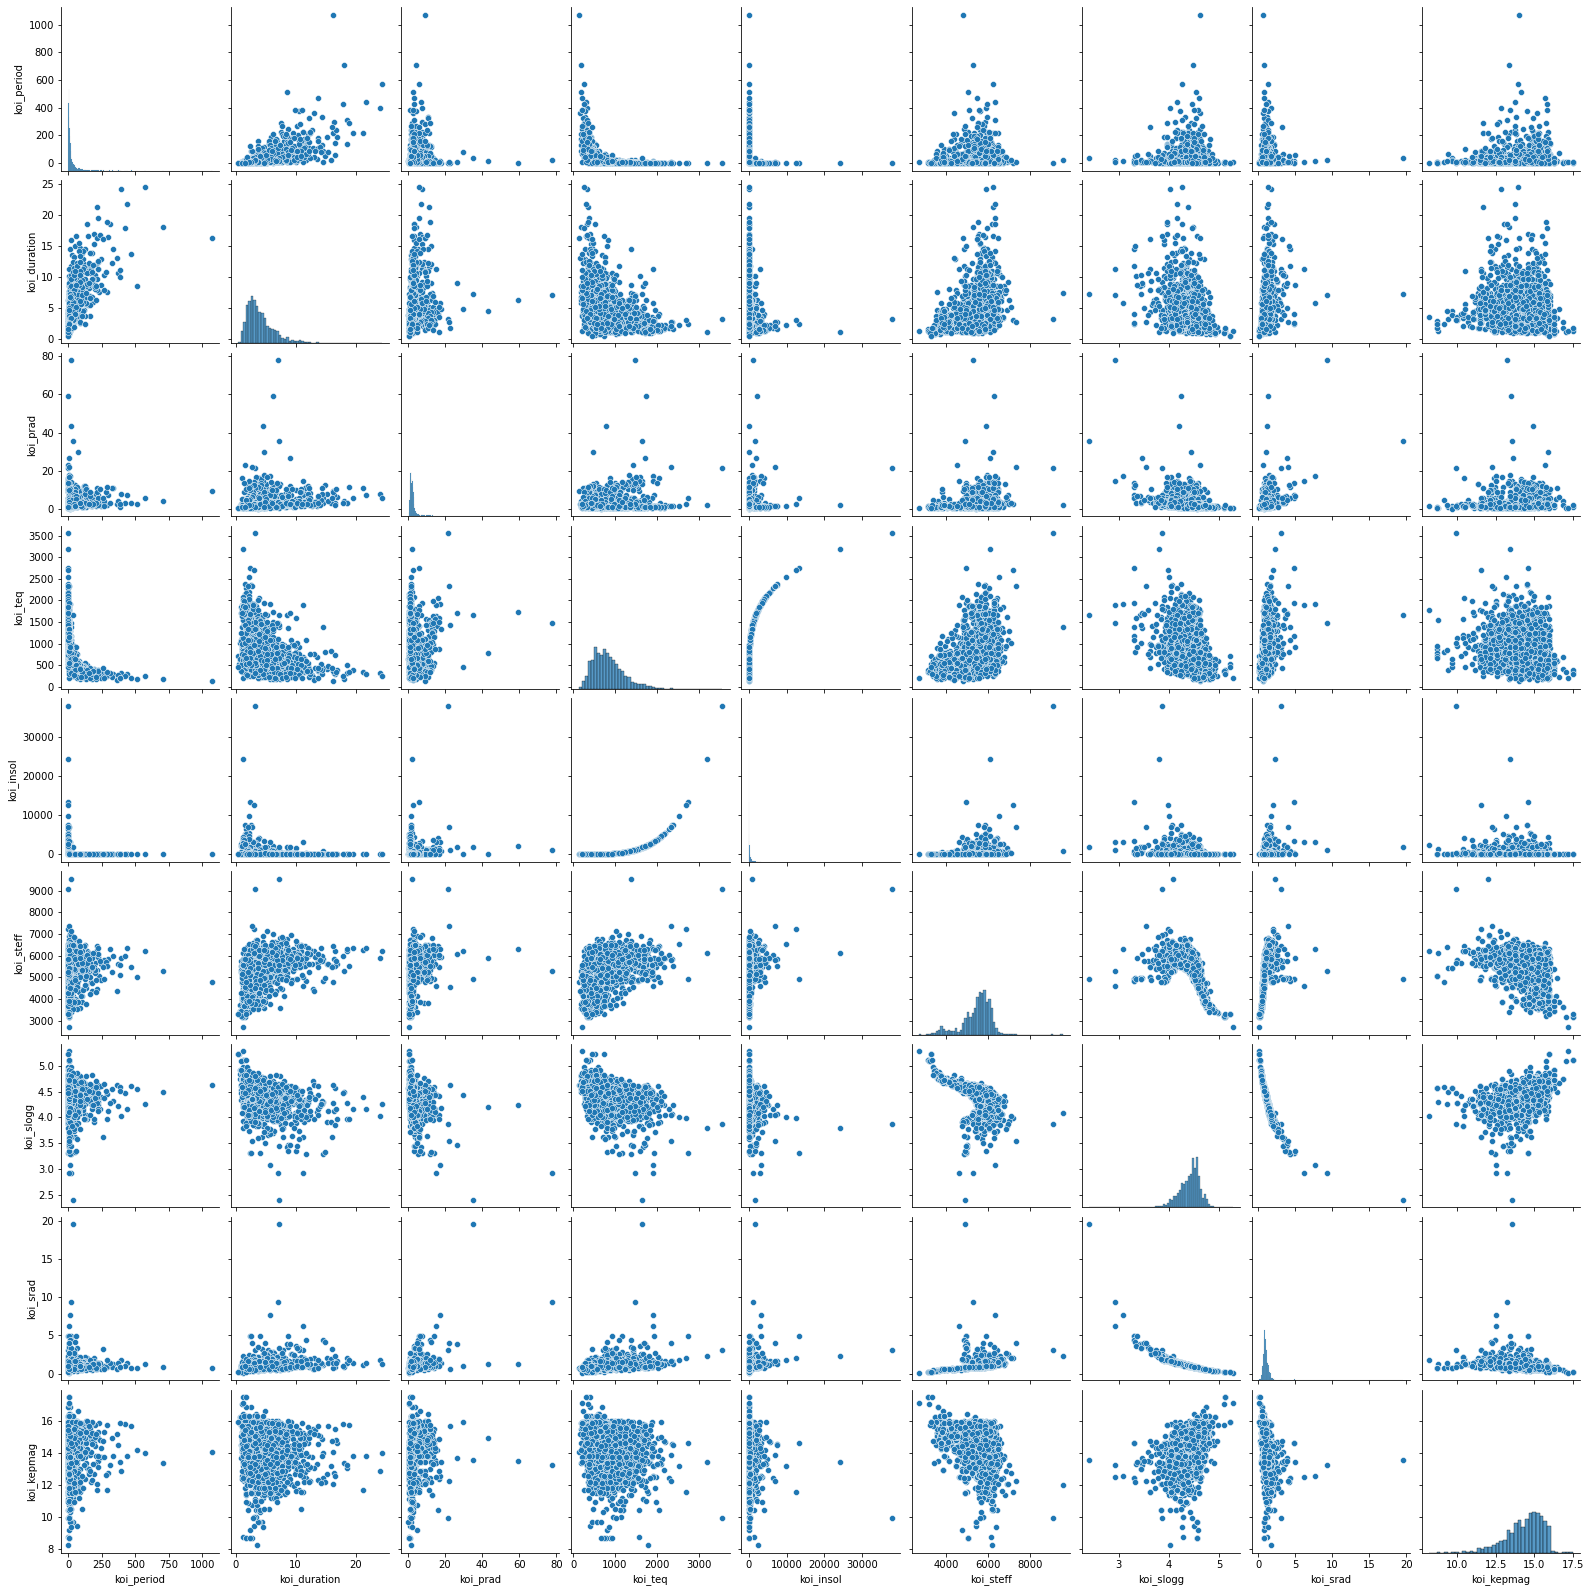

In [19]:
# Pairplot of each 2 columns
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.pairplot(confirmed_data)
plt.show()

This set of pair plots shows how the values of each two rows are distributed with respect to each other. On the main diagonal of this matrix of plots there are histograms of each sample in the table.

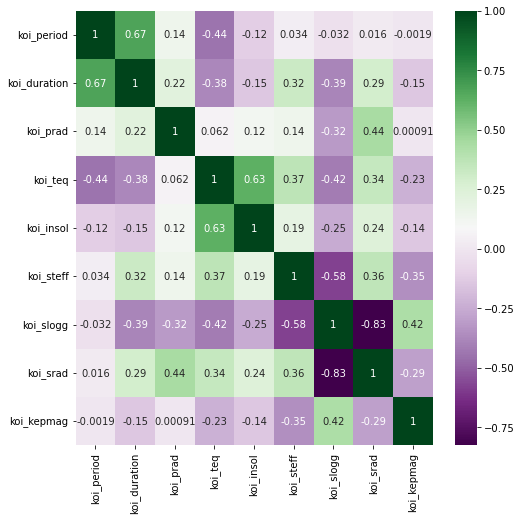

In [20]:
# Correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confirmed_data.corr(), annot=True, cmap='PRGn')
plt.show()

The correlation table presents the results of an analysis of the relationship between each two variables.

The correlation between the variable specified in the row and the variable specified in the column is indicated at the intersection of the row and column of such a table.

A review of the results of the correlation table shows that we have quite a few columns correlating with each other. In just one case, the absolute value of the correlation reaches about 0.83. In two more cases, the correlation approaches the value 0.67 and 0.63. For the other columns, the correlation cannot be considered significant.

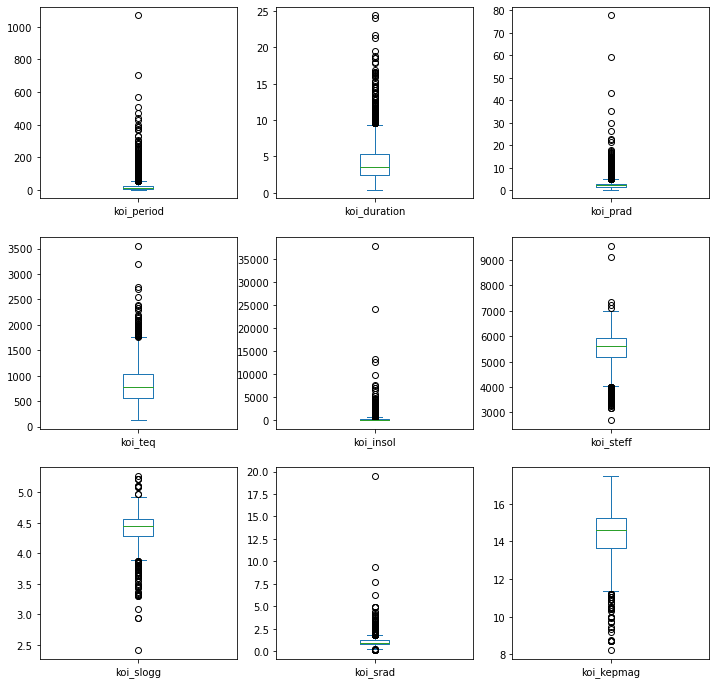

In [21]:
# Boxplots for each column
confirmed_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 12))
plt.show()

Boxplots show the median (middle line within the box) and quartiles (lines extending from the box). The median represents the central tendency of the data.The box itself shows the interquartile range (IQR), which indicates the spread of the middle 50% of the data. Points outside the whiskers are considered outliers. These represent extreme values in the dataset. The symmetry of the boxplot can indicate whether the data is skewed.

<br><br><br><br><br>

Outliers processing
==

Here we introduce the function that returns the series without outliers.<br>
Here Q1 corresponds to the 25% quartile, Q3 is a 75% quartile.<br>
IQR is an inter-quartile range measuring the interval holding 50% of the data.<br>
The statistical approach recommends to consider as outliers those values that do not fit in the IQR multiplied by 1.5.<br>
With the help of this function we remove outliers from all columns and continue analysing the dataset.

In [22]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series <= (Q3 + 1.5 * IQR)) & (series >= (Q1 - 1.5 * IQR))]

In [23]:
# A new dataset with removed outliers in each column
df_cleaned = confirmed_data.copy()

for column in confirmed_data.columns:
    df_cleaned[column] = remove_outliers(confirmed_data[column])

# Overview of the dataset with removed outliers
print(df_cleaned.describe())

        koi_period  koi_duration     koi_prad      koi_teq    koi_insol  \
count  2045.000000   2176.000000  2091.000000  2233.000000  2021.000000   
mean     13.817160      3.867424     2.149598   807.216749   126.212885   
std      12.499983      1.859576     0.871751   333.170663   147.024778   
min       0.341842      0.427900     0.270000   129.000000     0.070000   
25%       4.544436      2.443575     1.480000   547.000000    18.700000   
50%       9.673958      3.449850     2.060000   770.000000    66.950000   
75%      18.746490      4.950000     2.690000  1016.000000   182.690000   
max      55.822477      9.390000     5.050000  1761.000000   647.550000   

         koi_steff    koi_slogg     koi_srad   koi_kepmag  
count  2153.000000  2228.000000  2183.000000  2252.000000  
mean   5581.246633     4.426799     0.988600    14.413580  
std     514.301309     0.189794     0.285791     1.091714  
min    4041.000000     3.892000     0.274000    11.338000  
25%    5291.000000     4

In the initial dataset we had 2292 observations. Here we can notice that removing outliers did not affect the amount of values in some rows, but for some rows it did. Here we estimate the effect of removing outliers with respect to the initial amout of values.

In [24]:
# Counting non-empty valyes for all columns
data_check = pd.DataFrame(df_cleaned.count(), columns=['count'])
data_check['percent'] = (1 - data_check['count'] / 2292)*100
data_check

,count,percent
koi_period,2045,10.776614
koi_duration,2176,5.061082
koi_prad,2091,8.769634
koi_teq,2233,2.574171
koi_insol,2021,11.823735
koi_steff,2153,6.064572
koi_slogg,2228,2.792321
koi_srad,2183,4.755672
koi_kepmag,2252,1.745201


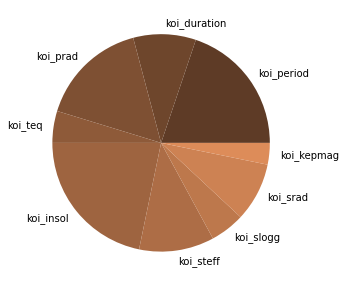

In [25]:
plt.figure(figsize=(6, 5))
cmap = plt.get_cmap("copper")
colors = cmap(np.linspace(0.3, 0.7, 9))
plt.pie(x=data_check['percent'], labels=data_check.index, colors=colors)
plt.show()

The table and the diagram show which columns were the most affected by the process of removing outliers. It can be seen that the columns 'koi_period', 'koi_prad' and 'koi_insol' have the highest percentages of empty values. <br>
The decision can be made to replace empty values with the median value. <br><br>
There are several approaches to handling missing values. It would be possible to delete rows with these values, but this would cause a lot of data loss. We can fill in the values with averages, but this will have a greater impact on the distribution of data. Therefore, it was decided to fill in the missing values with median values.

In [26]:
# Replacing empty values with median values for chosen columns
df_cleaned['koi_period'].fillna(value=df_cleaned['koi_period'].median(), inplace=True)
df_cleaned['koi_prad'].fillna(value=df_cleaned['koi_prad'].median(), inplace=True)
df_cleaned['koi_insol'].fillna(value=df_cleaned['koi_insol'].median(), inplace=True)

# Deleting rows with emply values, because not it will not affect the data so much
df_cleaned = df_cleaned.dropna()
# Also we need to reset indexes
df_cleaned = df_cleaned.reset_index(drop=True)

# Overview of the dataset after the described process
print(df_cleaned.describe())

        koi_period  koi_duration     koi_prad      koi_teq    koi_insol  \
count  1891.000000   1891.000000  1891.000000  1891.000000  1891.000000   
mean     13.639399      3.967978     2.146753   835.573242   130.229492   
std      11.872563      1.821977     0.803671   318.075315   143.634863   
min       0.577369      0.875200     0.510000   182.000000     0.260000   
25%       5.180620      2.595500     1.550000   588.000000    28.260000   
50%       9.673958      3.541300     2.060000   795.000000    66.950000   
75%      17.434398      5.024200     2.640000  1027.500000   178.050000   
max      55.822477      9.390000     5.000000  1761.000000   647.550000   

         koi_steff    koi_slogg     koi_srad   koi_kepmag  
count  1891.000000  1891.000000  1891.000000  1891.000000  
mean   5551.829720     4.426376     1.003774    14.423406  
std     511.010543     0.160989     0.257166     1.048975  
min    4041.000000     3.903000     0.452000    11.338000  
25%    5248.000000     4

<br><br><br><br><br>

When the process of data cleaup and handing outlies is done, we can draw plots, representing the data.<br>
Here again we perform a **pairplot** showing the distribution of each two columns respectively, the **correlation matrix** and **box-plots** reflecting the distribution of values within each column.

<Figure size 576x432 with 0 Axes>

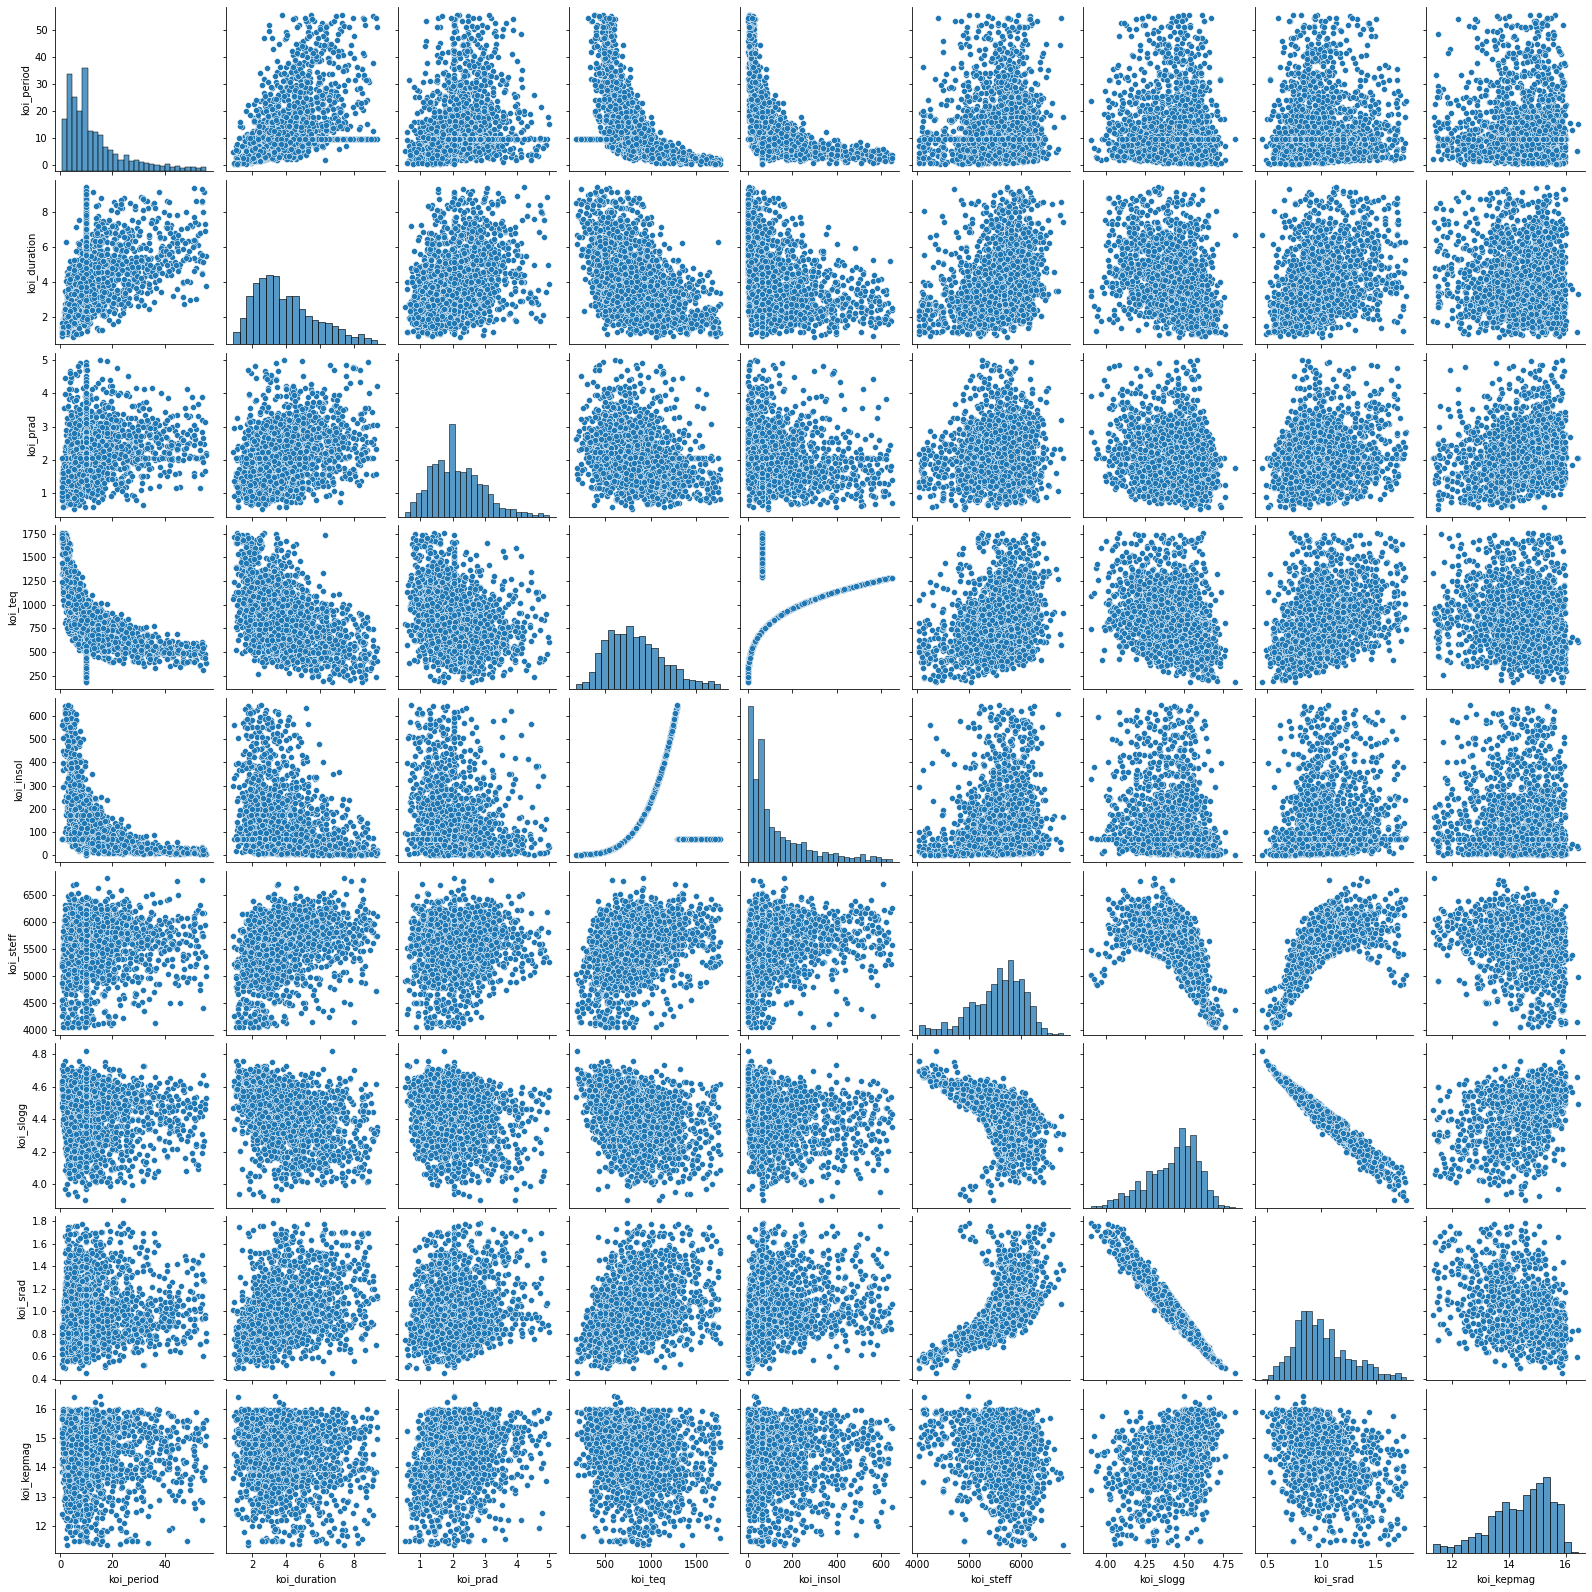

In [27]:
plt.figure(figsize=(8, 6))
sns.pairplot(df_cleaned)
plt.show()

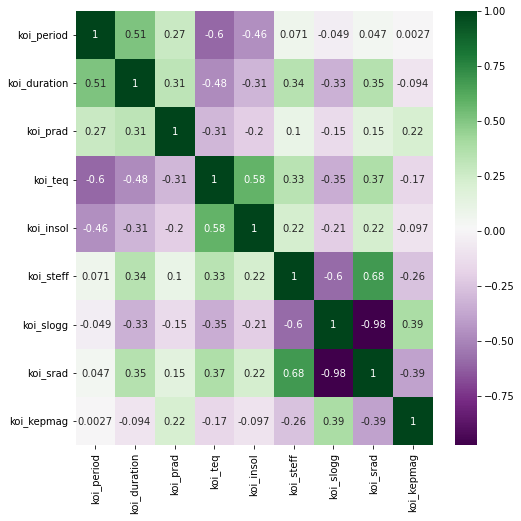

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='PRGn')
plt.show()

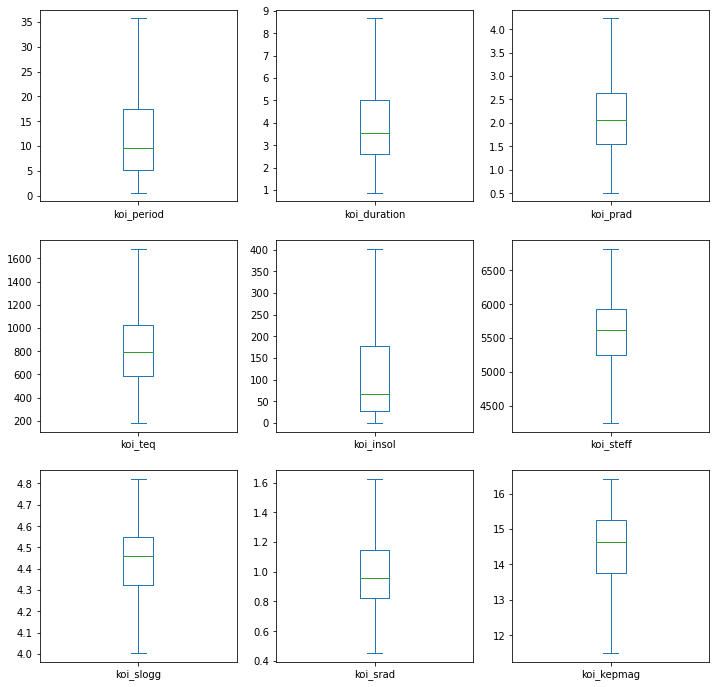

In [29]:
df_cleaned.plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 12), showfliers=False)
plt.show()

<br><br><br><br><br><br><br><br><br><br>

Data transformation
==

From the description of the data we know that the column 'koi_slogg' contains the base-10 logarithm of the acceleration due to gravity at the surface of the star. So, if we raise the base to the power of the values in the column, we will obtain the real values of the gravity of the star.<br><br>
The column 'koi_prad' contains the radius of the planet in units of the radius of Earth. From physics we know that the radius of Earth is 6378 km. So, if we multiply the values by this number, we will obtain the real radius the the planets.<br><br>
Finally, the column 'koi_srad' contains the radius of the host star in units of the Sun's radius. From physics we know that the radius of the Sun is 696230 km. So, if we multiply the values by this number, we will obtain the real radius the the stars.

In [30]:
LOG_BASE = 10
EARTH_RADIUS = 6378
SUN_RADIUS = 696230

df_cleaned['gravity'] = LOG_BASE**df_cleaned['koi_slogg']
df_cleaned['planet_radius'] = df_cleaned['koi_prad'] * EARTH_RADIUS
df_cleaned['star_radius'] = df_cleaned['koi_srad'] * SUN_RADIUS

# After the transformation is done, we will not need the initial columns,
# so we delete them
df_cleaned = df_cleaned.drop(columns=['koi_slogg', 'koi_prad', 'koi_srad'])

# Overview of the transformed data
df_cleaned.head()

,koi_period,koi_duration,koi_teq,koi_insol,koi_steff,koi_kepmag,gravity,planet_radius,star_radius
0,9.488036,2.9575,793.0,93.59,5455.0,15.347,29308.932453,14414.28,645405.21
1,54.418383,4.5070,443.0,9.11,5455.0,15.347,29308.932453,18049.74,645405.21
2,2.525592,1.6545,1406.0,66.95,6031.0,15.509,27415.741719,17539.50,728256.58
3,11.094321,4.5945,835.0,114.81,6046.0,15.714,30619.634337,24874.20,676735.56
4,4.134435,3.1402,1160.0,427.65,6046.0,15.714,30619.634337,17667.06,676735.56


<br><br><br><br><br><br><br><br><br><br>

Hypotheses
==

1
==

From the correlation matrix we saw that the conums 'koi_srad' and 'koi_slogg' had the strongest correlation.<br>
After the transformation of the data we now have columns 'star_radius' and 'gravity'.<br>
Let us have a closer look at their mutial distribution.

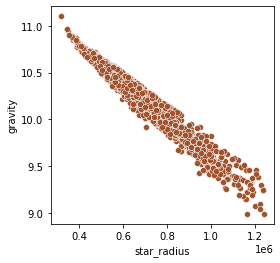

In [31]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=df_cleaned['star_radius'], y=np.log(df_cleaned['gravity']), color='sienna')
plt.show()

It can be assumed that the data represent an inverse exponential relationship of the form:

$$
gravity = \frac{C_1}{e^{C_2 *star radius}}
$$

This can be transformed into the following form if we take logarithms of both parts:

$$
ln(gravity) = ln(C_1) - ln(e^{C_2 *star radius})
$$

or just
$$
ln(gravity) = C_3 - C_2 *star radius
$$

Where C<sub>i</sub> are some constants.

Now, we can see that if we take logarithm of the values in the column 'gravity', it will be possible to construct a linear regression model. If this model shows that there exist a linear dependency of the transformed values, it will correspond to the initial values having an inverse exponential relationship of the form described above.

In [32]:
from sklearn import linear_model

# Data preparation
x = np.array(np.log(df_cleaned['gravity'])).reshape((-1, 1))
y = np.array(df_cleaned['star_radius'])

# Introducing the model
model = linear_model.LinearRegression()
model.fit(x, y)

# Obtaining the coefficients of the linear regression
intercept = model.intercept_
slope = model.coef_[0]
print(f"intercept: {intercept}")
print(f"slope: {slope}")

intercept: 5501743.735967443
slope: -471235.85153519537


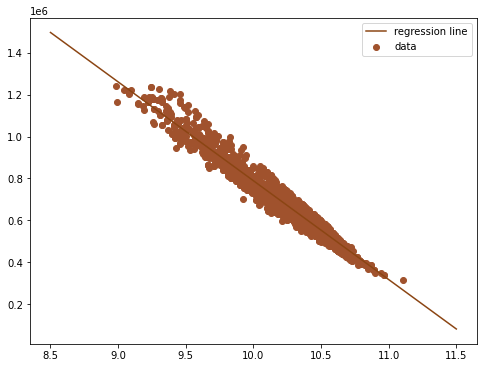

In [33]:
# Performing the plot with the values and the line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='sienna', label='data')
plt.plot([8.5, 11.5], [8.5 * slope + intercept, 11.5 * slope + intercept],
         color='saddlebrown', label='regression line')
plt.legend()
plt.show()

The graph shows that the values are substantially concentrated around a straight line with the coefficients found.<br>
This may indicate that the transformed data may indeed have a linear relationship.<br>
This, in turn, proves that the values in the columns 'gravity' and 'star_radius' may have an inverse exponential relationship. So we can consider the hypothesis **confirmed**.

<br><br><br><br><br>

2
==

Another hypothesis can be made about the distribution the values in the columns 'koi_period' which stands for the orbital period of the planet in days and shows the time that it takes the object to complete one orbit around its host star, and 'koi_teq' which contains the data about the equilibrium temperature of the planet's surface measured in Kelvins.<br>
First, let us have a closer look at their mutial distribution.

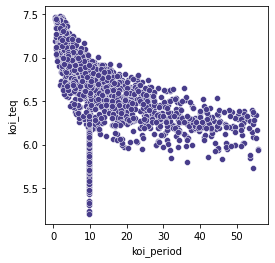

In [34]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=df_cleaned['koi_period'], y=np.log(df_cleaned['koi_teq']), color='darkslateblue')
plt.show()

Here, first of all, we notice some values forming a straight line around the values of 10 in 'koi_period'. 
This can be explained either by the presence of certain planets in the universe that have such an orbital period and do not obey the general distribution formula, or simply by an error in the measurement of the telescope as well as its physical limitations in detecting the exact characteristics of celestial bodies.<br>
We can also notice a sharp border at the right end of the graph, which may be due again to the physical limitations of the telescope or the permissible field of view from the position where the telescope is located and, consequently, the inability to detect the presence of other objects with large values of the parameter in question.

Despite the existing limitations in the capabilities of the telescope and the possible presence of anomalous planets, we can form the following hypothesis.

It can be assumed that the data represent an inverse relationship of the form:

$$
period = \frac{C_1}{temperature^{C_2}}
$$

This can be transformed into the following form if we take logarithms of both parts:

$$
ln(period) = ln(C_1) - ln(temperature^{C_2})
$$

or just
$$
ln(period) = C_3 - C_2 * ln(temperature)
$$

Where C<sub>i</sub> are some constants.

Now, we can see that if we take logarithms of the values in the columns 'koi_period' and 'koi_teq', it will be possible to construct a linear regression model. If this model shows that there exist a linear dependency of the transformed values, it will correspond to the initial values having an inverse relationship of the form described above.

In [35]:
# Data preparation
x = np.array(np.log(df_cleaned['koi_period'])).reshape((-1, 1))
y = np.array(np.log(df_cleaned['koi_teq']))

# Introducing the model
model = linear_model.LinearRegression()
model.fit(x, y)

# Obtaining the coefficients of the linear regression
intercept = model.intercept_
slope = model.coef_[0]
print(f"intercept: {intercept}")
print(f"slope: {slope}")

intercept: 7.359112943886446
slope: -0.31425927993576674


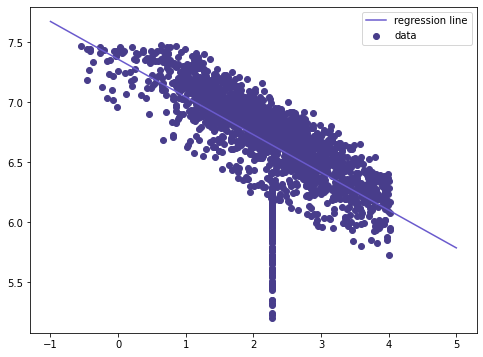

In [36]:
# Performing the plot with the values and the line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='darkslateblue', label='data')
plt.plot([-1, 5], [-1 * slope + intercept, 5 * slope + intercept],
         color='slateblue', label='regression line')
plt.legend()
plt.show()

The graph clearly demonstrates that the data points cluster tightly around a straight line with the identified coefficients. This concentration along a straight line strongly suggests that the transformed data likely exhibits a linear relationship. Consequently, this alignment supports the hypothesis that the values in the 'koi_period' and 'koi_teq' columns may indeed have an inverse relationship. Therefore, we can conclude that our assumption can be **confirmed**.

<br><br><br><br><br>

3
==

Now, let us consider the vaues of 'planet_radius' and 'star_radius'.<br>
The histograms of the corresponding data is performed below.

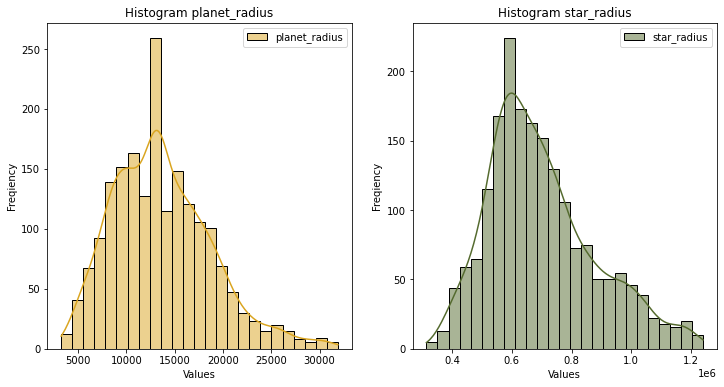

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Histogram of 'planet_radius'
sns.histplot(df_cleaned['planet_radius'], kde=True, bins=25, label='planet_radius', ax=axes[0], color='goldenrod')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Freqiency')
axes[0].set_title('Histogram planet_radius')
axes[0].legend()

# Histogram of 'star_radius'
sns.histplot(df_cleaned['star_radius'], kde=True, bins=25, label='star_radius', ax=axes[1], color='darkolivegreen')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Freqiency')
axes[1].set_title('Histogram star_radius')
axes[1].legend()

plt.show(fig)

It can be seen that both histograms resemble a histogram of the frequencies of the normal distribution. So the first hypothesis regarding these data may be the assumption that the values in these columns are normally distributed. Further, we will test this hypothesis.

Let us try to estimate the parameters of the normal distribution and display the normal curve with the specified parameters on a joint graph adjusted by the appropriate height factor due to the scale of the data.<br><br>
To estimate the distribution parameters, we will use two different approaches, each of which is applicable to one of the two data series.<br><br>
The first approach is based on data grouping. We will group the data into 25 rows with the same interval length. We will specify the left and right boundaries of the interval, as well as the value that is the center of the interval. Then we will count the number of values within each interval, then normalize it by the total number of values to get a polygon of interval frequencies. Next, we calculate the mean value as a weighted average over all intervals, as well as the standard deviation as the square root of the sum of the average quadratic deviations of each value in the middle of the interval from the mean. This will give us the estimated values of the mean and standard deviation of the normal distribution, which will be displayed on the graph.<br><br>
In the second approach, we estimate the mean and standard deviation over the entire data series using built-in functions. Let's build the appropriate diagrams and study the results.

In [38]:
# Implementing the first approach to the column 'planet_radius'

# Celecting the number of intervals
num_intervals = 25
# Calculating the length of the interval
interval_width = np.max(df_cleaned['planet_radius']) - np.min(df_cleaned['planet_radius']) / num_intervals

# Creating left and right boundaries
bins = np.linspace(np.min(df_cleaned['planet_radius']), np.max(df_cleaned['planet_radius']), num_intervals + 1)

# Grouping the data by intervals and count the number of values in each interval
grouped_data_1 = df_cleaned['planet_radius'].value_counts(bins=bins).sort_index()

# Creating the DataFrame with results
result_df_1 = pd.DataFrame({
    'Left': grouped_data_1.index.left,
    'Right': grouped_data_1.index.right,
    'Count': grouped_data_1.values
})

# Adding a column with adjusted numbers within each intervel
result_df_1['Adj'] = result_df_1['Count']/sum(result_df_1['Count'])
# Calculating midpoints of each interval
result_df_1['Midpoint'] = (result_df_1['Left'] + result_df_1['Right'])/2
# Calculating the mean
mean_planet = sum(result_df_1['Midpoint'] * result_df_1['Adj'])
print('Mean =', mean_planet)
# Calculating the standard deviation
std_planet = (sum((result_df_1['Midpoint']-mean_planet)**2 * result_df_1['Adj']))**0.5
print('Standard deviation = ', std_planet)

Mean = 13687.268253305132
Standard deviation =  5129.157446310727


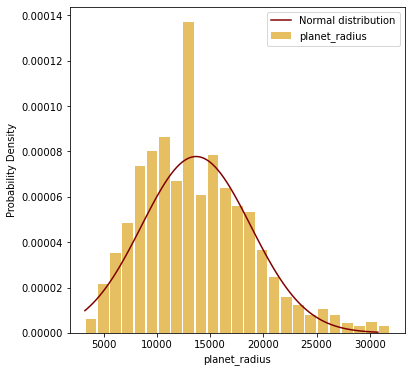

In [39]:
from scipy.stats import norm

# Plotting the graph
plt.figure(figsize=(6, 6))
# Plot of the initial data
plt.bar(result_df_1['Midpoint'], result_df_1['Adj'] / 1000, width=1000,
        label='planet_radius', color='goldenrod', alpha=0.7)

x_min = result_df_1['Left'][0]
x_max = result_df_1['Left'][len(result_df_1)-1]
x = np.linspace(x_min, x_max, 100)
# Calculate the probability density function (PDF) for each x
y = norm.pdf(x, mean_planet, std_planet)
# Plot of the normal curve
plt.plot(x, y, label=f'Normal distribution', color='maroon')
plt.xlabel('planet_radius')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

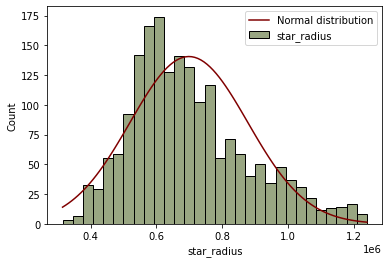

In [40]:
# Implementing the second approach to the column 'star_radius'

# Obtaining the mean and std values using built-in functions
mean_star, std_star = np.mean(df_cleaned['star_radius']), np.std(df_cleaned['star_radius'])

x_star = np.linspace(min(df_cleaned['star_radius']), max(df_cleaned['star_radius']), 100)
y_star = norm.pdf(x_star, loc=mean_star, scale=std_star)*10**7.8

sns.histplot(df_cleaned['star_radius'], bins=30, color='darkolivegreen', label='star_radius', alpha=0.6)
plt.plot(x_star, y_star, label=f'Normal distribution', color='maroon')

plt.legend()
plt.show()

From the graphs obtained, it can already be seen that the available data does not fit well into the density graph of the normal distribution. Moreover, this is typical for both data series, regardless of which method was chosen to estimate the distribution parameters.<br><br>
Nevertheless, we will try to test our hypothesis with the help of a mathematical apparatus, namely <br>
Shapiro–Wilk test (https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)<br>
and D'Agostino's K-squared test (https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test). <br>
For both tests we will be using built-in methods from the scipy module.

In [41]:
from scipy import stats

# Introducing the function to test normality
# alpha=0.05 implies that the null hypothesis is rejected 5% of the time when it is in fact true
def check_normality(data, alpha=0.05):
    shapiro_test = stats.shapiro(data)
    k2_test = stats.normaltest(data)

    results = {
        'Shapiro-Wilk': {
            'p-value': shapiro_test.pvalue,
            'normal': shapiro_test.pvalue > alpha
        },
        'K-squared': {
            'p-value': k2_test.pvalue,
            'normal': k2_test.pvalue > alpha
        }
    }
    return results

In [42]:
# Implementing the function to both data series and obtaining the results
normality_results_planet = check_normality(df_cleaned['planet_radius'])
normality_results_star = check_normality(df_cleaned['star_radius'])

# Observing the results
print(normality_results_planet)
print()
print(normality_results_star)

{'Shapiro-Wilk': {'p-value': 6.181750368642319e-19, 'normal': False}, 'K-squared': {'p-value': 1.2218360377559447e-28, 'normal': False}}

{'Shapiro-Wilk': {'p-value': 1.6452608449165794e-22, 'normal': False}, 'K-squared': {'p-value': 1.728826424455905e-29, 'normal': False}}


In [43]:
# Interpretating the results
print('Results: planet_radius')
if normality_results_planet['Shapiro-Wilk']['normal'] or normality_results_planet['K-squared']['normal']:
    print('The data may be normally distributed')
else:
    print('The data is likely not to be normally distributed')
print()   
print('Results: star_radius')
if normality_results_star['Shapiro-Wilk']['normal'] or normality_results_star['K-squared']['normal']:
    print('The data may be normally distributed')
else:
    print('The data is likely not to be normally distributed')    

Results: planet_radius
The data is likely not to be normally distributed

Results: star_radius
The data is likely not to be normally distributed


In the final data verification, we used the criterion that if at least one of the tests gave a positive result, then we conclude that the data could have a normal distribution.

As can be seen from the results, both tests give a negative result for both data series at a given level of accuracy. From this it can be concluded that the hypothesis of the normality of the data cannot be confirmed, despite the initial similarity of the histograms of the data series with the polygon of the frequencies of the normal distribution. From all this, we conclude that this hypothesis has been **disproved**.

<br><br><br><br><br><br><br><br><br><br>

Conclusion
==

This analysis examined the Kepler Exoplanet Search Results dataset. Data cleaning was performed, addressing missing values through filling and removal as appropriate. Descriptive statistics, including mean, standard deviation, median, quartiles, minimum, and maximum values, were calculated to summarize the dataset's characteristics.
Visualizations were generated to provide an overall understanding of the data, with further investigation and analysis focused on specific subsets of interest.
Three hypotheses were formulated and tested, two were supported by the analysis, while one was rejected.